In [86]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
    
import warnings
warnings.filterwarnings("ignore")

In [105]:
# read data
df = pd.read_csv("energy_consumption.csv")

# drop categorical feature
df = df.select_dtypes(include=['float64','int64'])

# split x, y
y = df['Appliances']
x = df.drop(['Appliances'], axis=1)

# split train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
x_train.shape

(13814, 30)

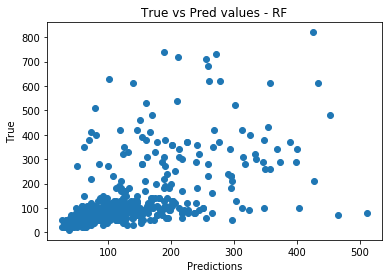

Root Mean Squared Error: [78.97871908]
Mean Absolute Error: [37.1476102]
Mean Absolute Percentage Error: 35.86206896551724


In [114]:
pred = RandomForestRegressor().fit(x_train,y_train).predict(x_test)

plotMetrics(y_test,pred,'RF',900)

In [106]:
feature_selection1=Pipeline([
    # part 5: feature selection
    ('select_from_model',SelectFromModel(RandomForestRegressor())),

    ('regression_model',RandomForestRegressor())
])
model = feature_selection1.fit(x_train,y_train)
columns = x_train.columns[feature_selection1.named_steps.select_from_model.get_support()]
print(columns)

Index(['RH_2', 'T3', 'RH_3', 'RH_5', 'Press_mm_hg', 'Tdewpoint', 'NSM'], dtype='object')


In [107]:
def mean_absolute_percentage_error(y_true, y_pred):
    
    # calculates mean absolute error of the true and predicted values
    
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    count = 0
    sum = 0
    for a,p in zip(y_true, y_pred):
        if(a != 0):
            sum += (abs(a-p)/a)
            count += 1
        return (sum/count)*100

def plotMetrics(y_test, y_pred, title, samples):

    # plots the true and predicted values and prints RMS, MAE and MAPE metrics
    
    plt.scatter(y_pred[0:samples],y_test.values[0:samples])
    plt.title('True vs Pred values - %s' % title)
    plt.xlabel('Predictions')
    plt.ylabel('True')
    plt.show()
    
    RMS = np.sqrt(mean_squared_error(y_test,y_pred, multioutput='raw_values'))
    MAE = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    MAPE = mean_absolute_percentage_error(y_test,y_pred)
    print("Root Mean Squared Error:", RMS)
    print("Mean Absolute Error:", MAE) 
    print("Mean Absolute Percentage Error:", MAPE)

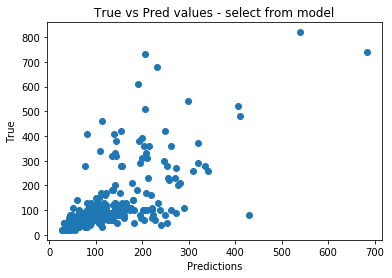

Root Mean Squared Error: [75.82363714]
Mean Absolute Error: [35.54078703]
Mean Absolute Percentage Error: 10.344827586206897


In [120]:
pred = model.predict(x_test)

plotMetrics(y_test,pred,'select from model', 500)  

In [116]:
model.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('select_from_model', SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
      ...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])>

In [117]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30,35,40],
    'max_features': ['auto','sqrt',5,6],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=3

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min


[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=  21.6s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=  21.7s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total= 1.1min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total= 1.1min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=30

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total= 1.1min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=  19.0s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=  19.2s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=  19.3s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=30,

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   8.8s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   8.7s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   4.1s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   4.2s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_dept

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=  12.5s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   7.8s
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   7.8s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=30

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.4min


[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   7.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth

[CV] bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=  13.2s
[CV] bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   8.2s
[CV] bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   8.2s
[CV] bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   8.3s
[CV] bootstrap=True, max_depth=30, max_features=5, min_s

[CV] bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=  11.8s
[CV] bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=  11.8s
[CV] bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   7.3s
[CV] bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   7.3s
[CV] bootstrap=True, max_depth=30, max_features=5, min_sam

[CV] bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   5.3s
[CV] bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=  10.9s
[CV] bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=  16.9s
[CV] bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=  17.0s
[CV] bootstrap=True, max_depth=30, max_features=6, min_samp

[CV] bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=20.0min
[CV] bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=20.0min
[CV] bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=20.4min
[CV] bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=20.3min
[CV] bootstrap=True, max_depth=30, max_features=6, min

[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  12.0s
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  11.9s
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  11.8s
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=  22.9s
[CV] bootstrap=True, max_depth=35, max_fea

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 67.1min


[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=  21.5s
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=  21.6s
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total= 1.1min
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total= 1.1min
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=35

[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total= 1.0min
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=  19.0s
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=  18.9s
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=  19.4s
[CV] bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=35,

[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  56.5s
[CV] bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   4.1s
[CV] bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  56.8s
[CV] bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   4.1s
[CV] bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=  12.3s
[CV] bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   7.8s
[CV] bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   7.7s
[CV] bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=  12.2s
[CV] bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=35

[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   9.4s
[CV] bootstrap=True, max_depth=35, max_features=

[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   4.1s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=  12.8s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=  12.8s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   8.2s
[CV]  bootstrap=True, max_depth=35, max_features=5, min_sam

[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   3.5s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   3.5s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=35, max_features=6, min

[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=  15.1s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   4.8s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   4.8s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=  14.3s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samp

[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   8.5s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   4.3s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   4.2s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   4.1s
[CV] bootstrap=True, max_depth=35, max_features=6, min_sampl

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 75.9min


[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   8.5s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   8.5s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=  12.6s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   4.2s
[CV] bootstrap=True, max_depth=35, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=35, max_features=6, min

[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=  44.0s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=  44.5s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total= 1.2min
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=  44.4s
[CV] bootstrap=True, max_depth=4

[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=  19.2s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total= 1.0min
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=  37.5s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=  37.8s
[CV] bootstrap=True, max_depth=40, 

[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=  14.0s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   4.3s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=  13.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   8.8s
[CV] bootstrap=True, max_depth=40, m

[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   8.3s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   8.2s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   3.9s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   3.9s
[CV] bootstrap=True, max_depth

[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   7.1s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   7.1s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300, total=  10.9s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=40, max_featur

[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=  12.2s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=  12.1s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   8.4s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   8.3s
[CV] bootstrap=True, max_depth=40, max_features=5, min_sam

[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=  11.1s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   3.7s
[CV] bootstrap=True, max_depth=40, max_features=5, min_sa

[CV] bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   4.7s
[CV] bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=  15.6s
[CV] bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=  15.4s
[CV] bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   9.5s
[CV] bootstrap=True, max_depth=40, max_features=6, min_

[CV] bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   4.3s
[CV] bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   4.2s
[CV] bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=10.8min
[CV] bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=10.8min
[CV] bootstrap=True, max_depth=40, max_features=6, min_sam

[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 107.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [30, 35, 40], 'max_features': ['auto', 'sqrt', 5, 6], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [118]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

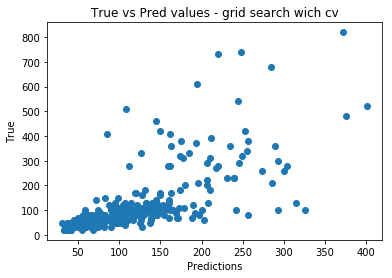

Root Mean Squared Error: [73.24939541]
Mean Absolute Error: [33.91114872]
Mean Absolute Percentage Error: 28.56896551724138


In [121]:
grid_pred = grid_search.best_estimator_.predict(x_test)
plotMetrics(y_test,grid_pred,'grid search wich cv',500)